In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, lab2rgb, deltaE_cie76
import os
%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (2240, 1601, 3)


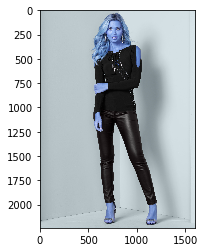

In [2]:
image_path = 'data/venus/women/tops/long_sleeve/lace_up_cold_shoulder_top/Alternate_4.jpg'
image = cv2.imread(image_path)
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

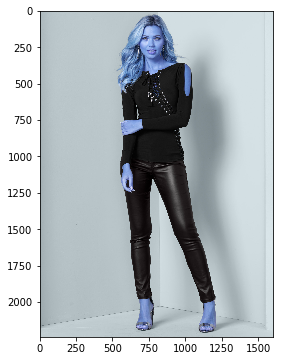

In [4]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (100, 6)), plt.imshow(image);

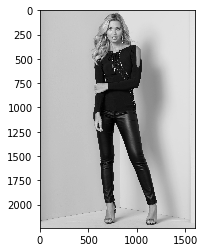

In [6]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray');

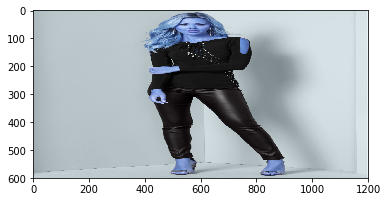

In [8]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image);

In [ ]:
resized_image = cv2.resize(image, (1000, 1200), interpolation = cv2.INTER_AREA)
plt.imshow(resized_image)

In [21]:
def RGB2HEX(color, RGB_format = False):
    '''
    This function returns the hex values of our the given color.
    
    This function assumes that the current color is in lab color.
    
    If the color format is in RGB, the RGB_format should be True.
    '''
    if not RGB_format:
        color = lab2rgb(np.uint8(color))
        
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [30]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    imgae = cv2.resize(image, (600, 400), interpolation=cv2.INTER_AREA)
    return image

In [39]:
def get_colors(image, number_of_colors, show_chart):

    #image = rgb2lab(np.uint8(np.asarray([image])))
    
    modified_image = image.reshape(
        image.shape[0]*image.shape[1], 3)
    
    print(modified_image.shape)
    
    

    clf = KMeans(n_clusters=number_of_colors)
    labels = clf.fit_predict(modified_image)

    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))

    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i], True) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize=(8, 6))
        plt.pie(counts.values(), labels=hex_colors, colors=hex_colors)

    return rgb_colors

[array([225.66117815, 221.568721  , 209.73688881]),
 array([23.92632418, 23.07868466, 25.26181793]),
 array([199.22841369, 194.33628195, 182.05845226]),
 array([168.43900221, 150.29940123, 134.10468231]),
 array([113.26015102,  83.6486064 ,  71.97792681])]

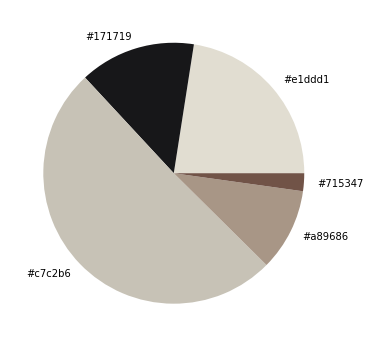

In [41]:
get_colors(get_image(image_path), 5, True)

[array([225.93996052, 221.8742579 , 210.05374794]),
 array([22.18394724, 21.57998515, 23.87913026]),
 array([201.54113985, 197.16620434, 185.04842386]),
 array([154.83921612, 149.70408345, 137.76857246]),
 array([152.35211139, 105.45617861,  84.49656108]),
 array([185.83437389, 181.5383846 , 169.42682865]),
 array([209.5106317 , 153.53894226, 124.84003147]),
 array([71.25888407, 60.4834297 , 57.88119075])]

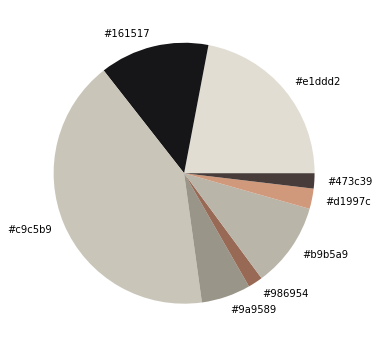

In [42]:
get_colors(get_image(image_path), 8, True)